# Lab 4
## Yash Bhargava
## B20AI050

##Imports


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##1. Monthly changes in different food grain stocks.

###Loading Dataset

In [107]:
df1 = pd.read_csv('https://raw.githubusercontent.com/CyanTarantula/DV-Lab-4/main/data/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')
df1

,Particulars,Frequency,Unit,9-2013,10-2013,11-2013,12-2013,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014
0,Foodgrains,Monthly,Ton mn,59.24,62.68,59.69,58.37,55.91,52.48,48.39,63.06,69.85,65.34
1,Foodgrains Rice,Monthly,Ton mn,19.03,16.85,14.22,14.70,16.94,18.88,20.28,20.42,20.65,21.24
2,Foodgrains Unmilled Paddy in term of Rice,Monthly,Ton mn,4.11,11.73,14.41,15.62,14.77,12.76,10.28,8.24,7.61,4.30
3,Foodgrains Wheat,Monthly,Ton mn,36.10,34.10,31.07,28.05,24.20,20.84,17.83,34.40,41.59,39.80


In [108]:
df1_pivot = df1.drop(index=0)
df1_pivot

,Particulars,Frequency,Unit,9-2013,10-2013,11-2013,12-2013,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014
1,Foodgrains Rice,Monthly,Ton mn,19.03,16.85,14.22,14.70,16.94,18.88,20.28,20.42,20.65,21.24
2,Foodgrains Unmilled Paddy in term of Rice,Monthly,Ton mn,4.11,11.73,14.41,15.62,14.77,12.76,10.28,8.24,7.61,4.30
3,Foodgrains Wheat,Monthly,Ton mn,36.10,34.10,31.07,28.05,24.20,20.84,17.83,34.40,41.59,39.80


##2. State wise Colleges of different Ayush Category.

###Loading Dataset

In [96]:
df2 = pd.read_csv('https://raw.githubusercontent.com/CyanTarantula/DV-Lab-4/main/data/MergerdAyush_Colleges_in_India_01-04-2021_0.csv')
df2

,State or Union Territory,Type of System,No. of Colleges - Govt,Admission Capacity - Govt,Permitted Seats - Govt,No. of Colleges - Non-Govt,Admission Capacity - Non-Govt,Permitted Seats - Non-Govt
0,Andhra Pradesh,Ayurveda,1,100,100,2,176,118
1,Assam,Ayurveda,1,93,93,0,0,0
2,Bihar,Ayurveda,2,211,211,6,280,153
3,Chhattisgarh,Ayurveda,2,216,216,4,280,250
4,Delhi,Ayurveda,3,359,359,0,0,0
...,...,...,...,...,...,...,...,...
76,Telangana,Homoeopathy,1,163,163,4,350,350
77,Uttar Pradesh,Homoeopathy,9,1027,1027,4,374,242
78,Uttarakhand,Homoeopathy,0,0,0,2,110,50
79,West Bengal,Homoeopathy,5,459,459,7,395,380


In [97]:
df2 = df2.groupby(['State or Union Territory', 'Type of System'])[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].sum().reset_index()
df2['Total Colleges'] = df2['No. of Colleges - Govt'] + df2['No. of Colleges - Non-Govt']
df2.drop(['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'], axis=1, inplace=True)
df2

,State or Union Territory,Type of System,Total Colleges
0,Andhra Pradesh,Ayurveda,3
1,Andhra Pradesh,Homoeopathy,7
2,Andhra Pradesh,Naturopathy,2
3,Andhra Pradesh,Unani,1
4,Assam,Ayurveda,1
...,...,...,...
76,Uttarakhand,Naturopathy,1
77,Uttarakhand,Unani,1
78,West Bengal,Ayurveda,4
79,West Bengal,Homoeopathy,12


In [98]:
df2_pivot = df2.pivot(index='State or Union Territory', columns='Type of System', values='Total Colleges')
df2_pivot = df2_pivot.sort_index()
df2_pivot.columns = [col + ' total' for col in df2_pivot.columns]
df2_pivot = df2_pivot.reset_index()
df2_pivot = df2_pivot.fillna(0)
df2_pivot.head()

,State or Union Territory,Ayurveda total,Homoeopathy total,Naturopathy total,Siddha total,Unani total
0,Andhra Pradesh,3.0,7.0,2.0,0.0,1.0
1,Assam,1.0,3.0,0.0,0.0,0.0
2,Bihar,8.0,15.0,0.0,0.0,5.0
3,Chandigarh,0.0,1.0,0.0,0.0,0.0
4,Chhattisgarh,6.0,3.0,1.0,0.0,1.0


In [99]:
df2_pivot['State or Union Territory'] = df2_pivot['State or Union Territory'].str.strip()
df2_pivot = df2_pivot.groupby('State or Union Territory').sum().reset_index()  
df2_pivot.head()                                                                                                                                                                             

,State or Union Territory,Ayurveda total,Homoeopathy total,Naturopathy total,Siddha total,Unani total
0,Andhra Pradesh,3.0,7.0,2.0,0.0,1.0
1,Arunachal Pradesh,0.0,1.0,0.0,0.0,0.0
2,Assam,1.0,3.0,0.0,0.0,0.0
3,Bihar,8.0,15.0,0.0,0.0,5.0
4,Chandigarh,1.0,1.0,0.0,0.0,0.0


In [100]:
df2_pivot.set_index('State or Union Territory', inplace=True)

### Plots

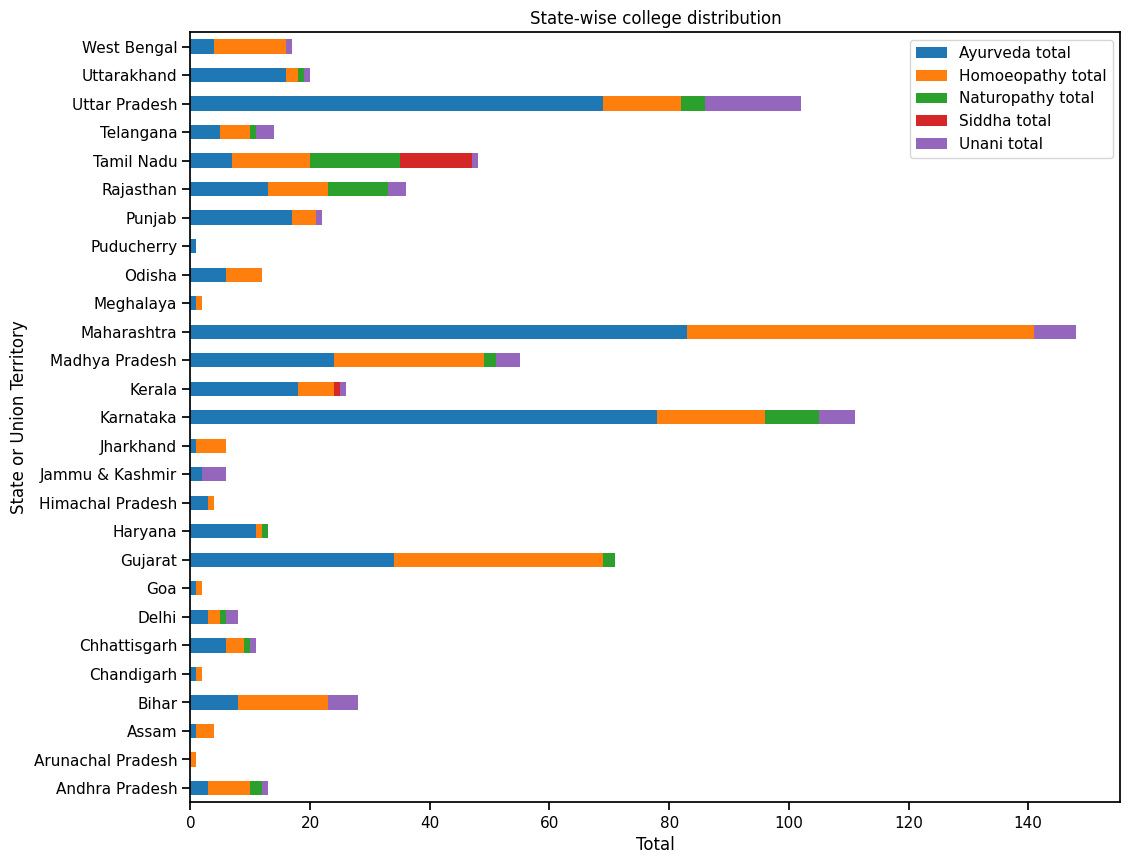

In [101]:
sns.set_context('notebook')
fig = df2_pivot.plot(kind='barh', stacked=True, figsize=(12,10))
fig.set_xlabel('Total')
fig.set_title('State-wise college distribution')

plt.show()

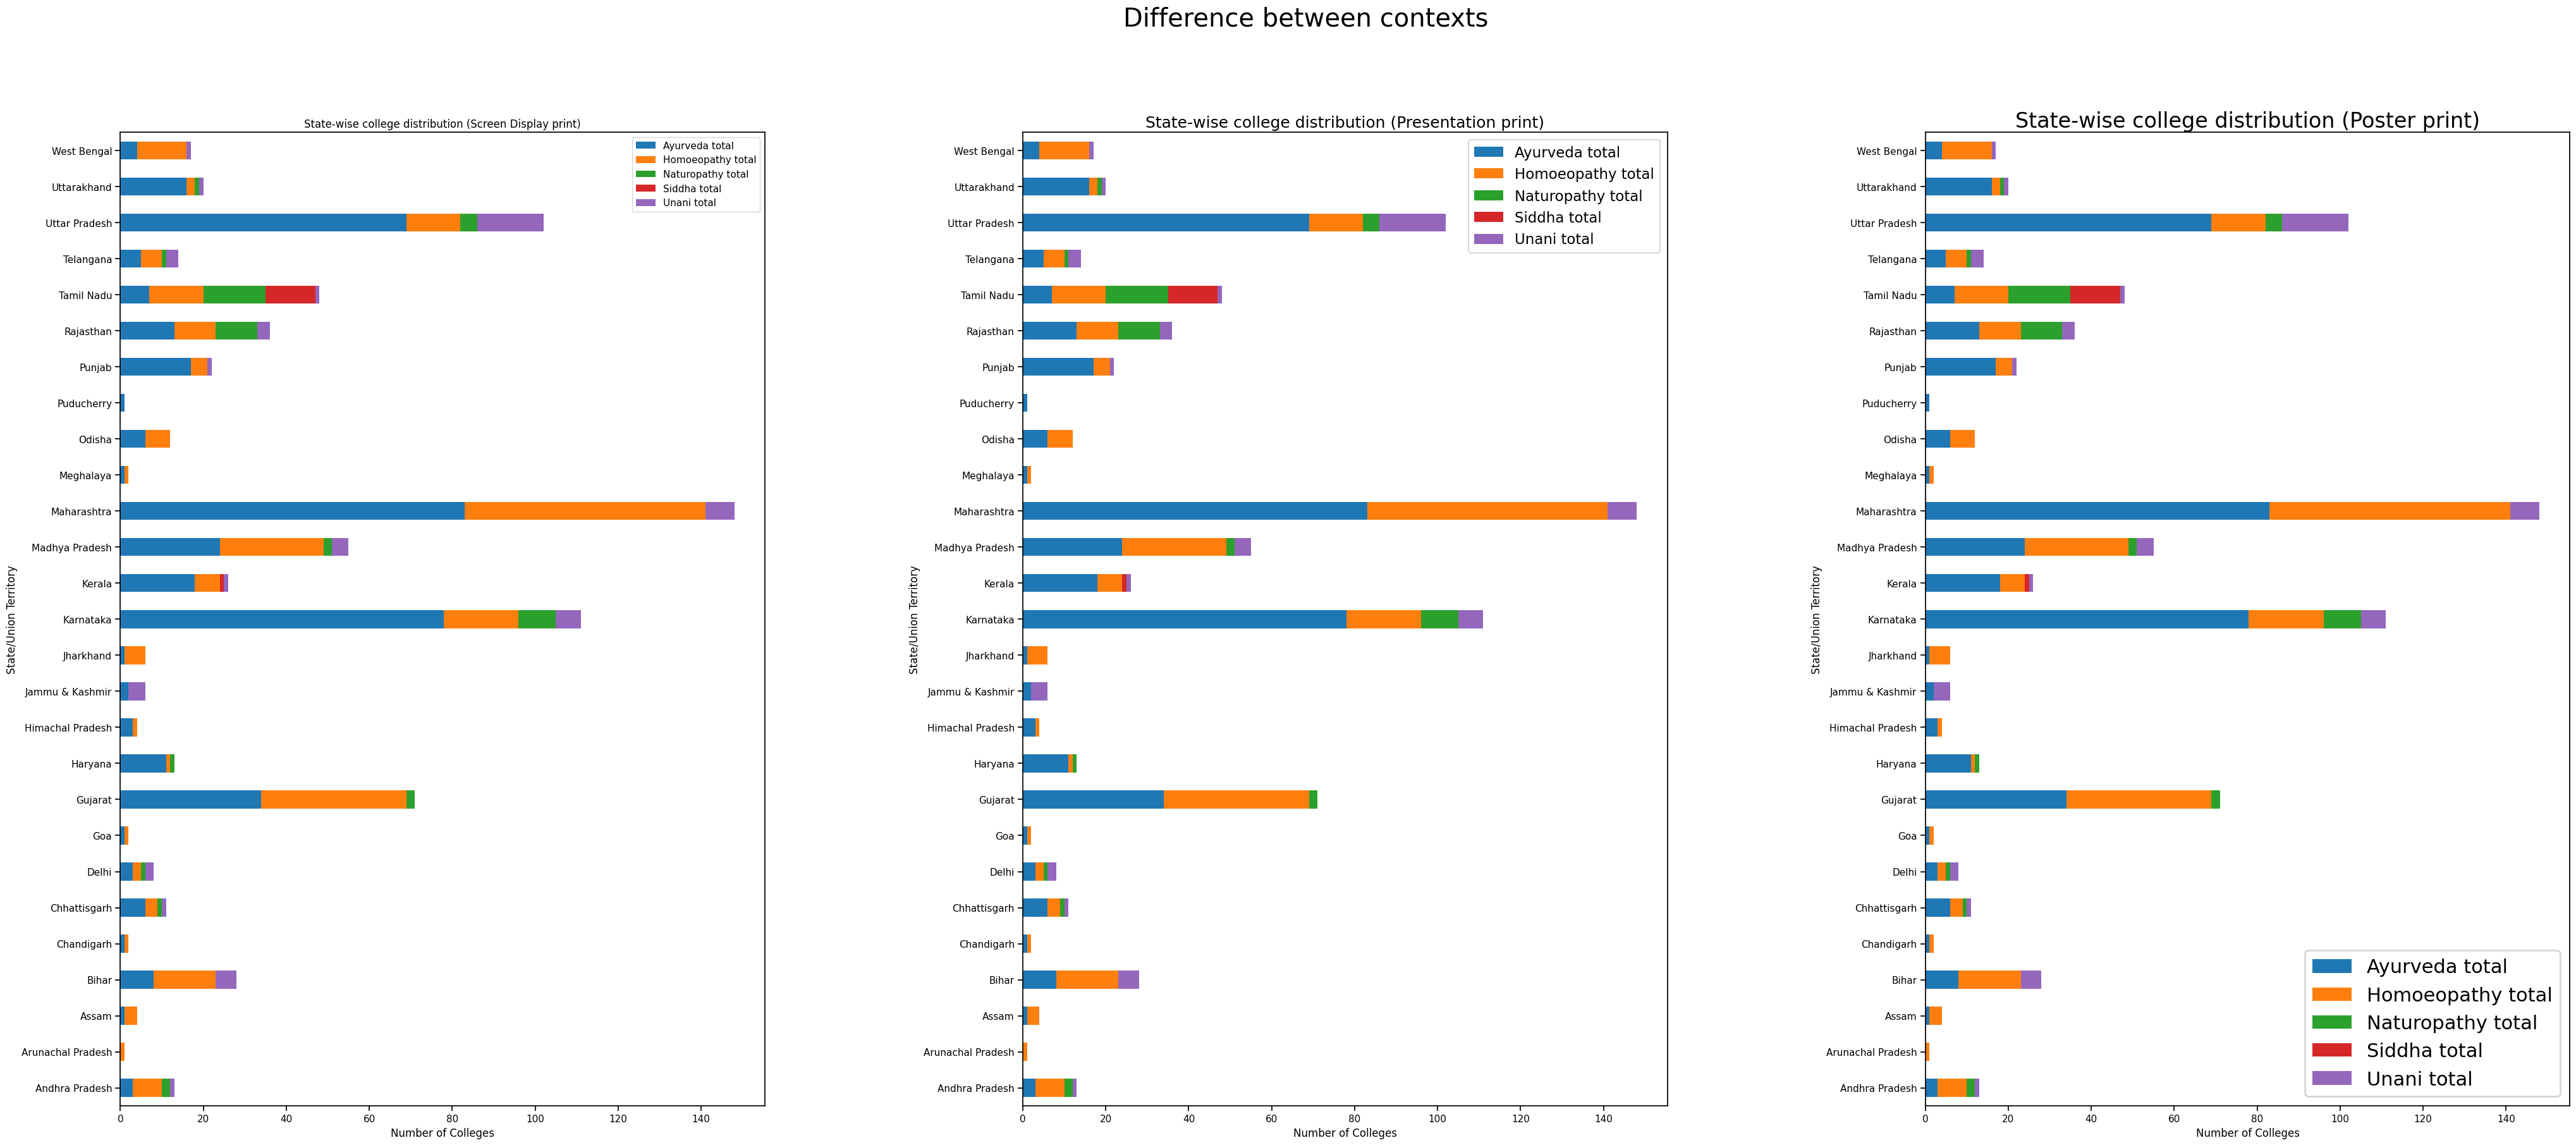

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(50, 20))

# Screen Display
fig1 = axes[0]
sns.set_context('notebook')
df2_pivot.plot(kind='barh', stacked=True, ax=fig1)
fig1.set_xlabel('Number of Colleges')
fig1.set_ylabel('State/Union Territory')
fig1.set_title('State-wise college distribution (Screen Display print)')

# Presentation
fig2 = axes[1]
sns.set_context('talk')
df2_pivot.plot(kind='barh', stacked=True, ax=fig2)
fig2.set_xlabel('Number of Colleges')
fig2.set_ylabel('State/Union Territory')
fig2.set_title('State-wise college distribution (Presentation print)')

# Poster
fig3 = axes[2]
sns.set_context('poster')
df2_pivot.plot(kind='barh', stacked=True, ax=fig3)
fig3.set_xlabel('Number of Colleges')
fig3.set_ylabel('State/Union Territory')
fig3.set_title('State-wise college distribution (Poster print)')

plt.subplots_adjust(wspace=0.4)
fig.suptitle("Difference between contexts")
plt.show()

###Color palettes

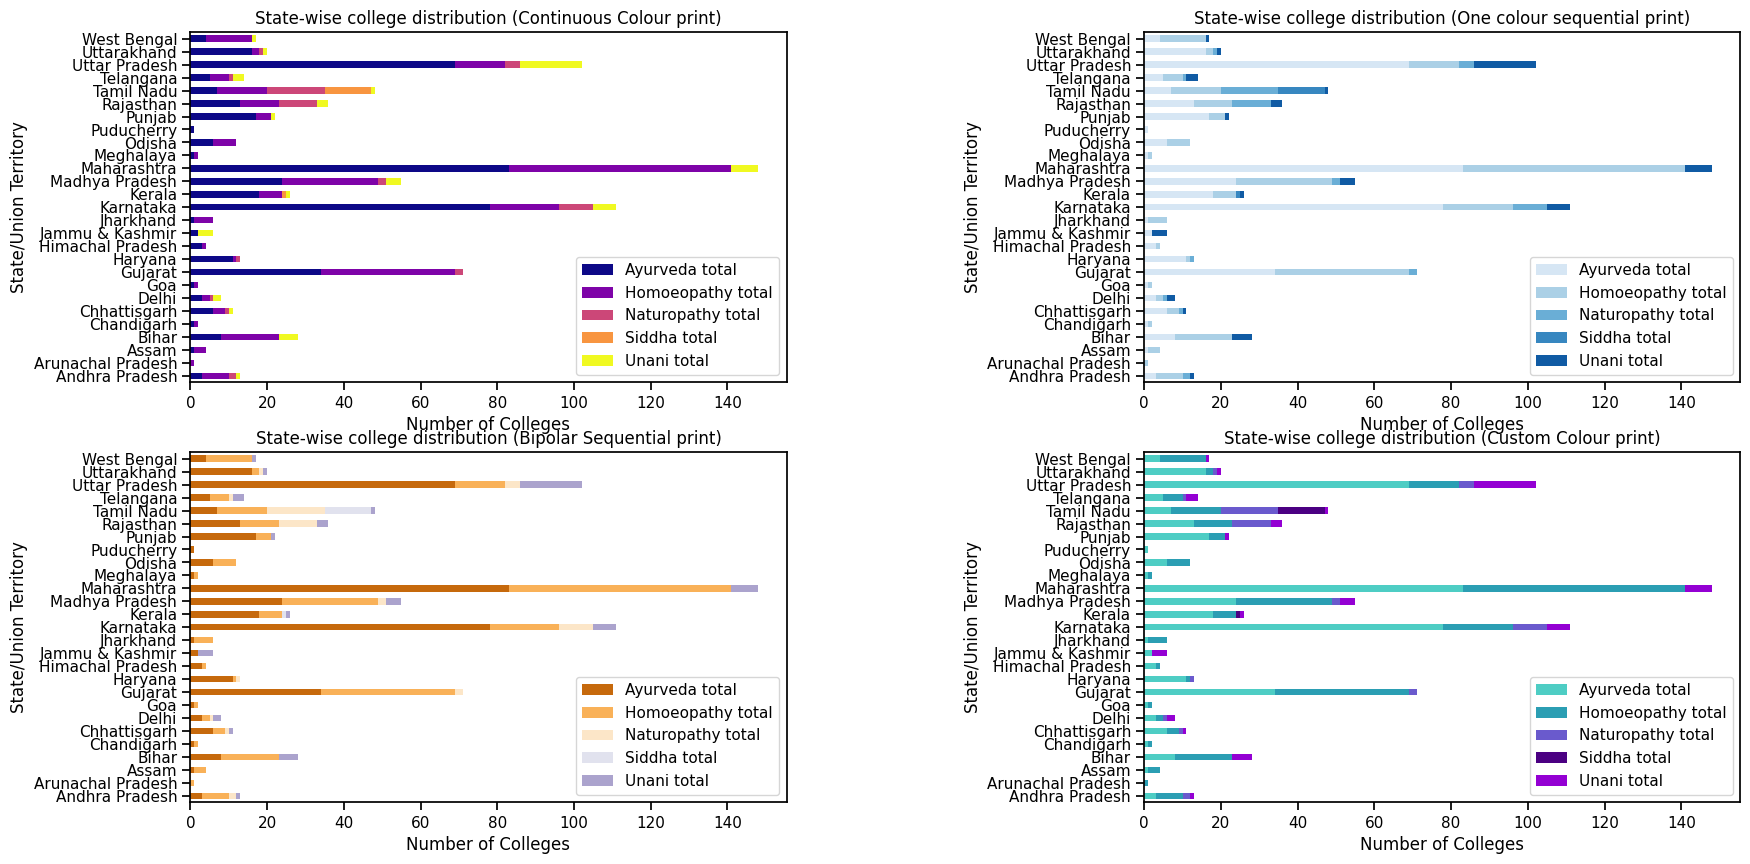

In [103]:
sns.set_context('notebook')

fig, axes = plt.subplots(2, 2, figsize=(40, 70))

# Continuous colour
fig1 = axes[0][0]
df2_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), cmap='plasma', ax=fig1)
fig1.set_xlabel('Number of Colleges')
fig1.set_ylabel('State/Union Territory')
fig1.set_title('State-wise college distribution (Continuous Colour print)')

# One colour sequential
fig2 = axes[0][1]
df2_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=sns.color_palette('Blues', n_colors=len(df2_pivot.columns)), ax=fig2)
fig2.set_xlabel('Number of Colleges')
fig2.set_ylabel('State/Union Territory')
fig2.set_title('State-wise college distribution (One colour sequential print)')

# Bipolar Sequential
fig3 = axes[1][0]
df2_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=sns.color_palette('PuOr'), ax=fig3)
fig3.set_xlabel('Number of Colleges')
fig3.set_ylabel('State/Union Territory')
fig3.set_title('State-wise college distribution (Bipolar Sequential print)')

# Custom Colour
fig4 = axes[1][1]
df2_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'], ax=fig4)
fig4.set_xlabel('Number of Colleges')
fig4.set_ylabel('State/Union Territory')
fig4.set_title('State-wise college distribution (Custom Colour print)')

plt.subplots_adjust(wspace=0.6)

plt.show()

###Scale

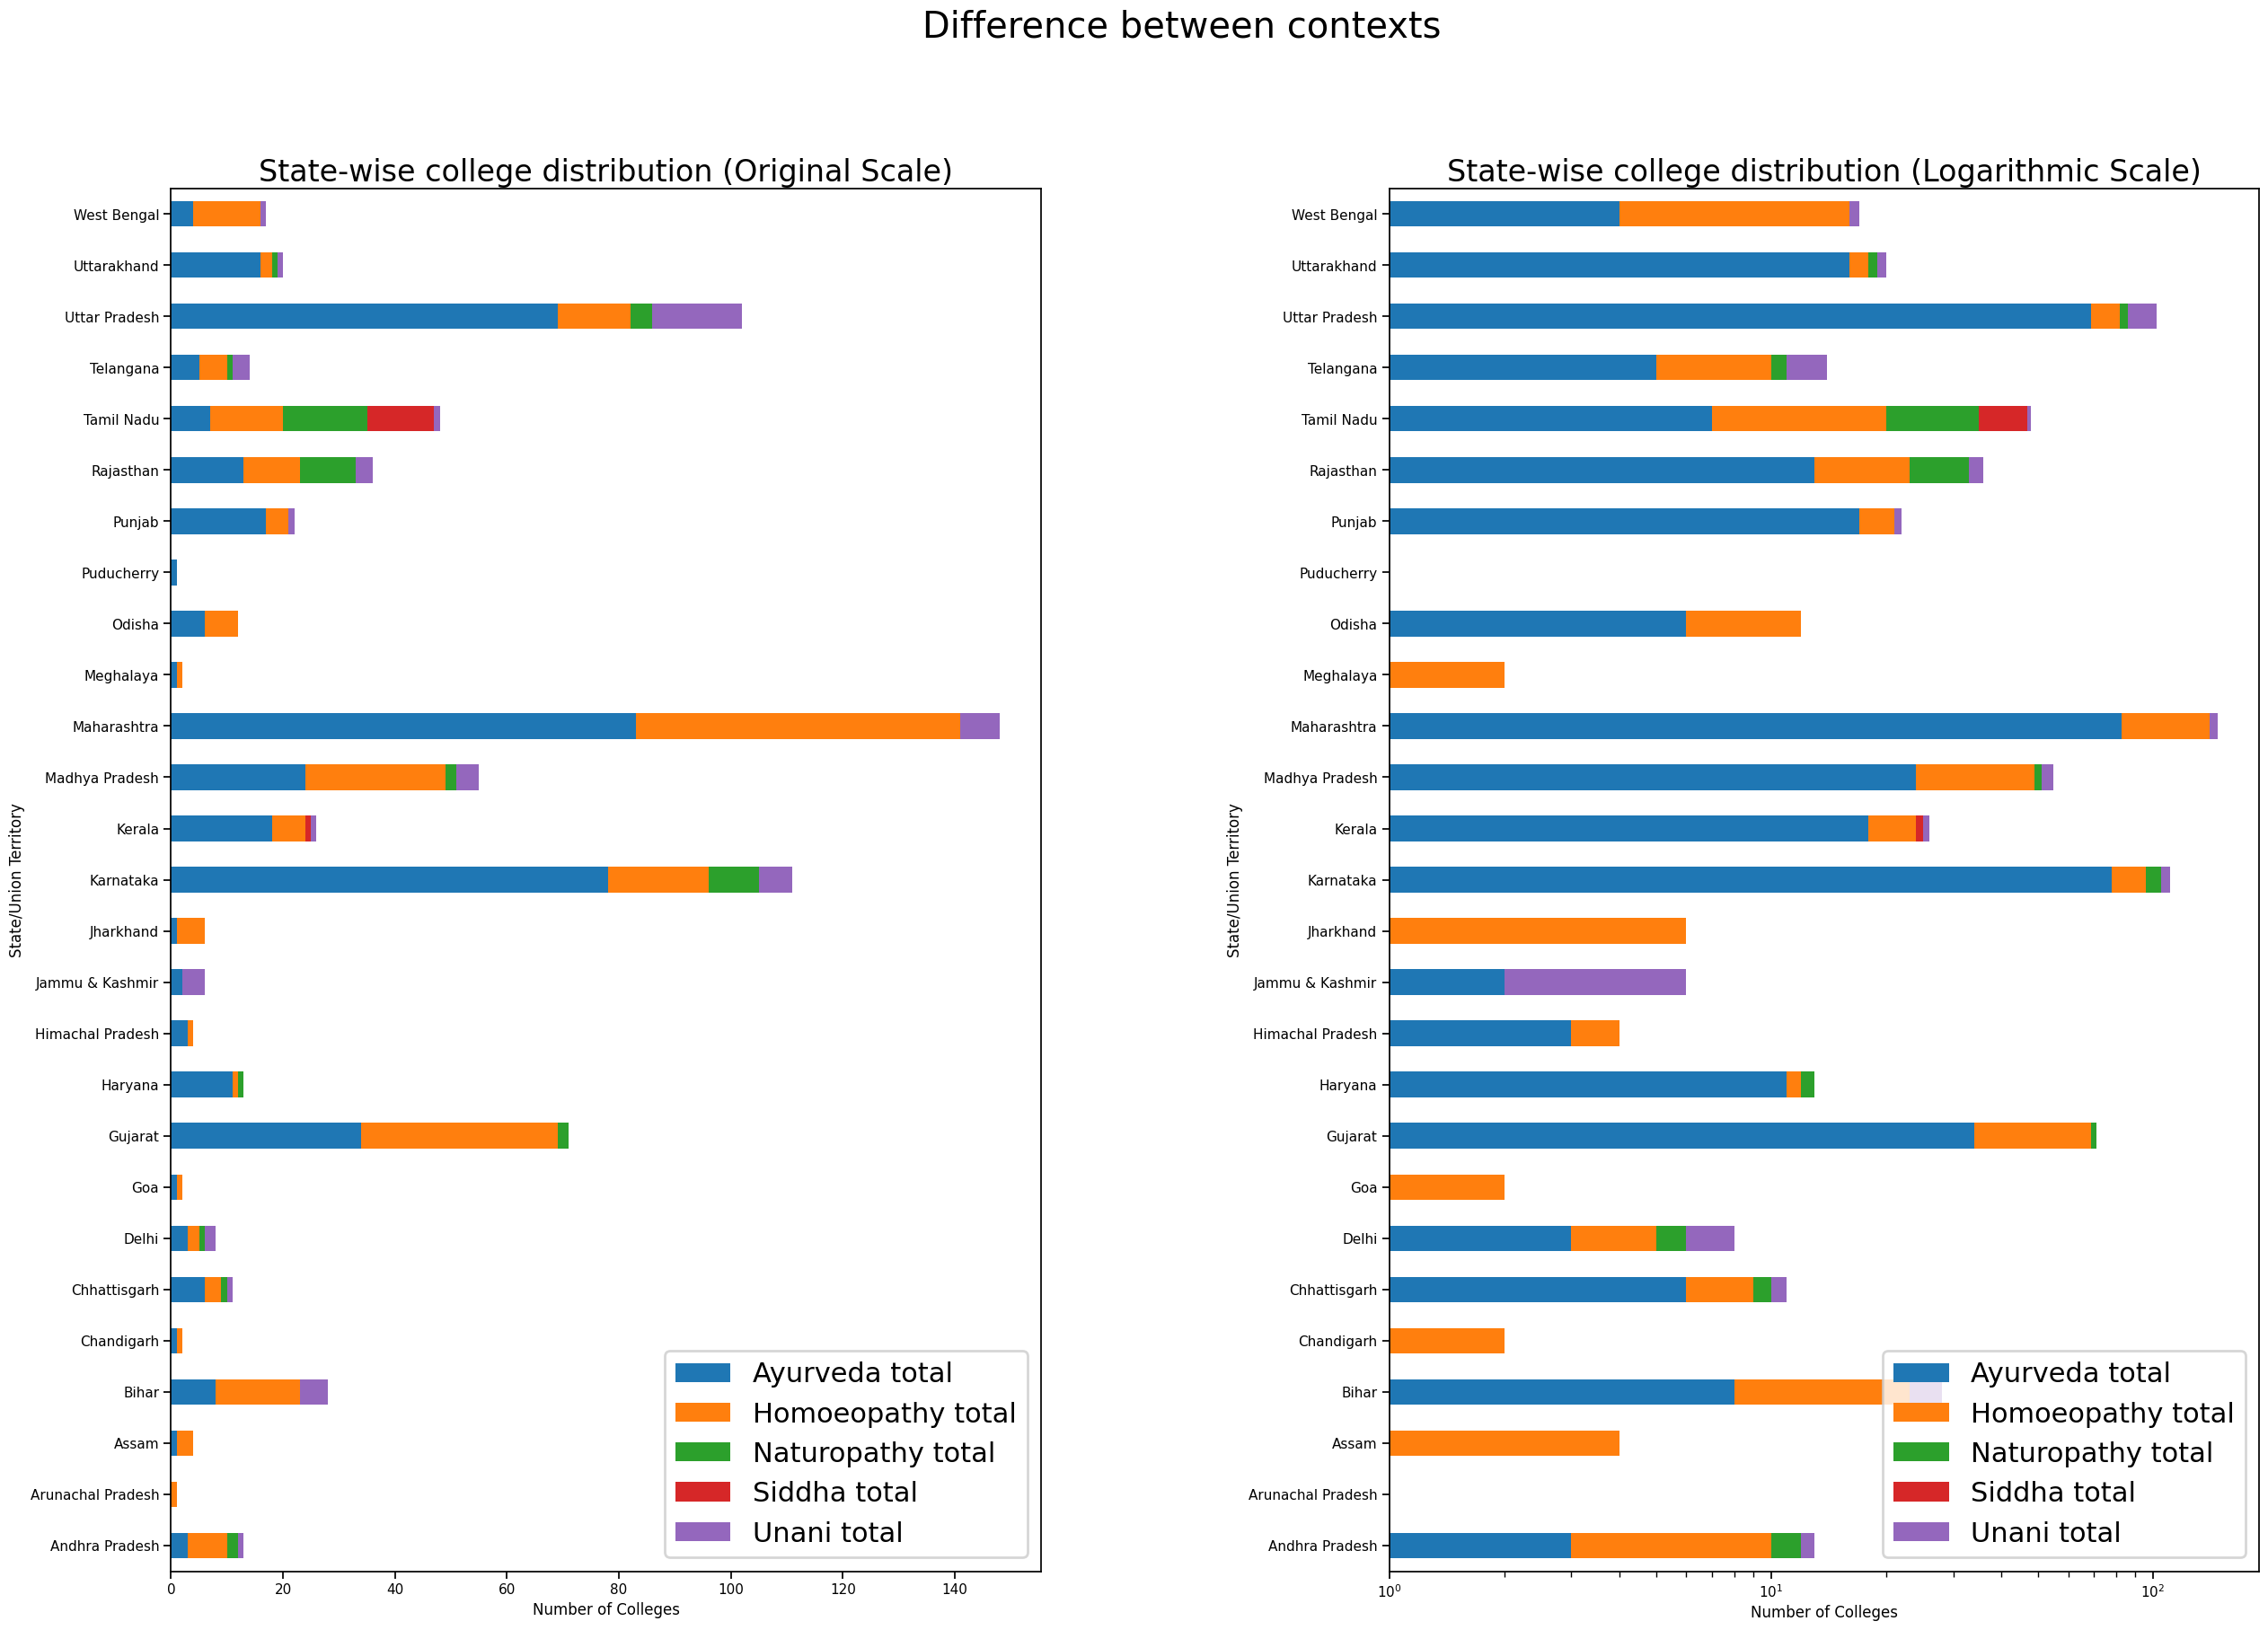

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(30, 20))
sns.set_context('poster')

# Original Scale
fig1 = axes[0]
df2_pivot.plot(kind='barh', stacked=True, ax=fig1)
fig1.set_xlabel('Number of Colleges')
fig1.set_ylabel('State/Union Territory')
fig1.set_title('State-wise college distribution (Original Scale)')

# Logarithmic Scale
fig2 = axes[1]
df2_pivot.plot(kind='barh', stacked=True, ax=fig2)
fig2.set_xlabel('Number of Colleges')
fig2.set_ylabel('State/Union Territory')
fig2.set_title('State-wise college distribution (Logarithmic Scale)')
fig2.set(xscale='log')

plt.subplots_adjust(wspace=0.4)
fig.suptitle("Difference between contexts")
plt.show()

##3. Distribution of National, State and District roads

###Loading Dataset

In [116]:
df3 = pd.read_csv('https://raw.githubusercontent.com/CyanTarantula/DV-Lab-4/main/data/Road_Transport_BRS_2017-18_Annexure7_9c.csv')
df3.head()

,Name of the States,National Highways,State Highways,District Roads,Rural Roads,Urban Roads,Project Roads,Total road Length,Total Population,Road length per '000 pop,Road length per '000 Population - National Highways,Road length per '000 Population - State Highways,Road length per '000 Population - District Roads,Road length per '000 Population - Rural Roads,Road length per '000 Population - Urban roads,Road length per '000 Population - Project Roads
0,Andhra Pradesh,10207,15753,58083,217892,34878,9447,346260,84581,4.09,0.12,0.19,0.69,2.58,0.41,0.11
1,Arunachal Pradesh,2537,13500,8731,20807,56,4924,50555,1384,36.54,1.83,9.76,6.31,15.04,0.04,3.56
2,Assam,3909,2530,6093,303672,5603,21803,343609,31206,11.01,0.13,0.08,0.20,9.73,0.18,0.70
3,Bihar,4877,4006,11145,258800,9184,2559,290571,104099,2.79,0.05,0.04,0.11,2.49,0.09,0.02
4,Chhattisgarh,3592,4176,11965,54308,12765,15772,102578,25545,4.02,0.14,0.16,0.47,2.13,0.50,0.62


In [117]:
df3_pivot = df3.iloc[:, :4]
df3_pivot.tail()

,Name of the States,National Highways,State Highways,District Roads
31,Daman & Diu,22,22,59
32,Delhi,70,0,2462
33,Lakshadweep,0,0,0
34,Puducherry,64,0,793
35,INDIA (1) ++,126350,186908,611268


In [118]:
df3_pivot.drop(index = 35, inplace = True)
df3_pivot.set_index('Name of the States', inplace=True)
df3_pivot

,National Highways,State Highways,District Roads
Name of the States,,,
Andhra Pradesh,10207,15753,58083
Arunachal Pradesh,2537,13500,8731
Assam,3909,2530,6093
Bihar,4877,4006,11145
Chhattisgarh,3592,4176,11965
Goa,293,280,1191
Gujarat,6050,17201,30809
Haryana,2788,1801,21897
Himachal Pradesh,2607,827,3647
